In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.layers import InputLayer

In [5]:
# Load MNIST dataset And Normalize data
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0  # Normalize data

In [6]:
# Add random noise to the images
noise_factor = 0.5
#np.random.normal(loc=0.0,scale=1.0,size=train.shape) generates random Gaussian (normal) noise
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

In [7]:
# Clip values to stay within [0, 1] range
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

In [12]:
# Build the autoencoder model
autoencoder = Sequential([

    InputLayer((28, 28, 1)),
    Flatten(),

    Dense(128, activation='relu'),  # Encoder part
    Dense(64, activation='relu'),

    Dense(128, activation='relu'),  # Decoder part
    Dense(784, activation='sigmoid'),  # Output layer
    Reshape((28, 28, 1))
    
])

# Compile the model
autoencoder.compile(optimizer='adam',metrics='accuracy', loss='binary_crossentropy')

In [13]:
# Reshape data for model input
X_train_noisy = X_train_noisy.reshape(-1, 28, 28, 1)
X_test_noisy = X_test_noisy.reshape(-1, 28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [14]:
# Train the autoencoder
autoencoder.fit(X_train_noisy, X_train, epochs=10, batch_size=256, validation_split=0.1)
# autoencode.fit(X_train_noisy,Xtrain,epochs=10,batch_size=34,validation_split=0.2)

Epoch 1/10
211/211 [==============================] - 3s 11ms/step - loss: 0.2530 - accuracy: 0.7872 - val_loss: 0.1835 - val_accuracy: 0.8016
Epoch 2/10
211/211 [==============================] - 2s 8ms/step - loss: 0.1677 - accuracy: 0.8035 - val_loss: 0.1568 - val_accuracy: 0.8055
Epoch 3/10
211/211 [==============================] - 2s 8ms/step - loss: 0.1499 - accuracy: 0.8064 - val_loss: 0.1449 - val_accuracy: 0.8071
Epoch 4/10
211/211 [==============================] - 2s 8ms/step - loss: 0.1404 - accuracy: 0.8079 - val_loss: 0.1375 - val_accuracy: 0.8084
Epoch 5/10
211/211 [==============================] - 2s 8ms/step - loss: 0.1348 - accuracy: 0.8088 - val_loss: 0.1332 - val_accuracy: 0.8087
Epoch 6/10
211/211 [==============================] - 2s 8ms/step - loss: 0.1308 - accuracy: 0.8094 - val_loss: 0.1299 - val_accuracy: 0.8095
Epoch 7/10
211/211 [==============================] - 2s 8ms/step - loss: 0.1278 - accuracy: 0.8098 - val_loss: 0.1275 - val_accuracy: 0.8102
Epoch

In [15]:
# Test the autoencoder on the test data
denoised_images = autoencoder.predict(X_test_noisy)

313/313 [==============================] - 0s 1ms/step


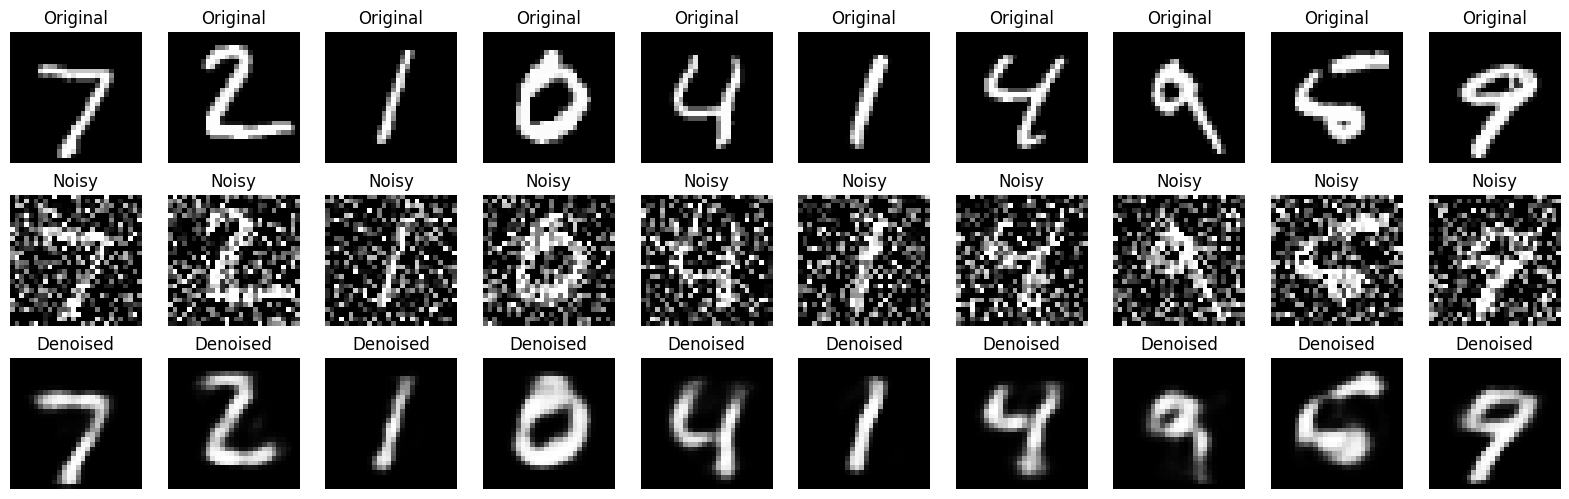

In [17]:
# Display noisy and denoised images for comparison
n = 10  # Display 10 images
plt.figure(figsize=(20, 6))  # Adjusted height to fit three rows

for i in range(n):
    # Display original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")
    
    # Display noisy image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(X_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.title("Noisy")
    plt.axis("off")
    
    # Display denoised image
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_images[i].reshape(28, 28), cmap="gray")
    plt.title("Denoised")
    plt.axis("off")

plt.show()